# 使用传统的方法对G.png进行二值化处理得到掩膜mask，也要去最大联通域

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def threshold_binary(image_path, threshold):
    # 读取图像
    image = cv2.imread(image_path, 0)  # 以灰度模式读取图像

    # 对图像进行阈值二值化
    _, binary_image = cv2.threshold(image, threshold, 1, cv2.THRESH_BINARY)

    return binary_image

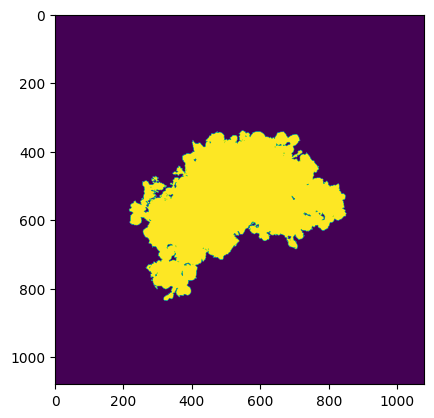

In [9]:
from skimage.measure import label
import numpy as np
def get_largest_aero(input_mask):
    """
        对淹没取最大联通域
    """
    labeled_mask = label(input_mask)
    unique_labels, label_counts = np.unique(labeled_mask, return_counts=True)
    largest_label = unique_labels[np.argmax(label_counts[1:]) + 1]  # 忽略背景标签(0)

    largest_component_array = np.zeros_like(labeled_mask, dtype=np.uint8)
    largest_component_array[labeled_mask == largest_label] = 1

    return largest_component_array

# 示例用法
image_path = '20231103-ZYL-ALL/1030-D0-1-all/B2-G.png'  # 替换为实际图像的路径
threshold = 0  # 阈值设定
image = threshold_binary(image_path, threshold)

# plt.imshow(get_largest_aero(image), cmap='viridis')  # cmap参数用于指定灰度图像的颜色映射，默认为'viridis'
plt.imshow(get_largest_aero(image), cmap='viridis')  # cmap参数用于指定灰度图像的颜色映射，默认为'viridis'
plt.axis('on')  # 关闭坐标轴
plt.show()

In [25]:
# 批量二值化且取最大联通域
import os
import glob
import shutil

folder_path = '20231103-ZYL-ALL/1103-D5-1-all'
target_path = '20231107#ALL_binary/1103-D5-1-all-binary'
img_files = glob.glob(os.path.join(folder_path, '*G.png'))

os.makedirs(target_path, exist_ok=True)

for img_path in img_files:
    
    print(img_path)
    threshold = 0  # 阈值设定
    image = threshold_binary(img_path, threshold)


    largest_mask = get_largest_aero(image)

    kernel = np.ones((20, 20), np.uint8)  # 定义一个 5x5 的内核
    output_mask = cv2.morphologyEx(largest_mask, cv2.MORPH_CLOSE, kernel)
    # 定义膨胀核
    # kernel = np.ones((5, 5), np.uint8)

    # # 进行膨胀处理
    # image = cv2.dilate(image, kernel, iterations=5)

    mask_path = os.path.join(target_path, img_path.split("/")[-1])
    # 使用matplotlib显示图像
    # plt.imshow(output_mask, cmap='gray')  # cmap参数用于指定灰度图像的颜色映射，默认为'viridis'
    # plt.axis('on')  # 关闭坐标轴
    # plt.show()
    cv2.imwrite(mask_path, output_mask)

20231103-ZYL-ALL/1103-D5-1-all/F10-G.png
20231103-ZYL-ALL/1103-D5-1-all/E11-G.png
20231103-ZYL-ALL/1103-D5-1-all/E4-G.png
20231103-ZYL-ALL/1103-D5-1-all/C7-G.png
20231103-ZYL-ALL/1103-D5-1-all/G2-G.png
20231103-ZYL-ALL/1103-D5-1-all/C3-G.png
20231103-ZYL-ALL/1103-D5-1-all/G6-G.png
20231103-ZYL-ALL/1103-D5-1-all/E2-G.png
20231103-ZYL-ALL/1103-D5-1-all/B8-G.png
20231103-ZYL-ALL/1103-D5-1-all/G4-G.png
20231103-ZYL-ALL/1103-D5-1-all/G10-G.png
20231103-ZYL-ALL/1103-D5-1-all/D9-G.png
20231103-ZYL-ALL/1103-D5-1-all/D11-G.png
20231103-ZYL-ALL/1103-D5-1-all/E7-G.png
20231103-ZYL-ALL/1103-D5-1-all/G3-G.png
20231103-ZYL-ALL/1103-D5-1-all/C6-G.png
20231103-ZYL-ALL/1103-D5-1-all/C4-G.png
20231103-ZYL-ALL/1103-D5-1-all/E5-G.png
20231103-ZYL-ALL/1103-D5-1-all/F11-G.png
20231103-ZYL-ALL/1103-D5-1-all/E10-G.png
20231103-ZYL-ALL/1103-D5-1-all/B9-G.png
20231103-ZYL-ALL/1103-D5-1-all/G11-G.png
20231103-ZYL-ALL/1103-D5-1-all/D10-G.png
20231103-ZYL-ALL/1103-D5-1-all/D8-G.png
20231103-ZYL-ALL/1103-D5-1-all/G

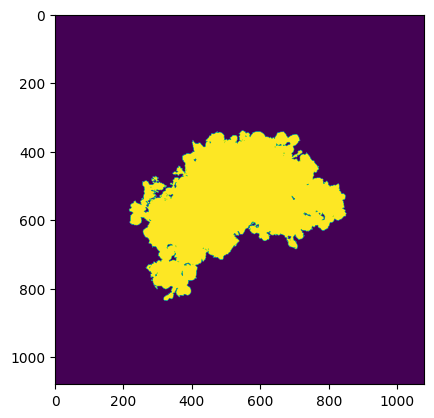

1